In [3]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import os

In [1]:
dir = './Trainset/'

In [9]:
files = list(os.walk(dir))[0][2]

In [10]:
images = []

for img in files:

    images.append(np.array(cv.imread(dir+img)))

In [11]:
y = np.array([cv.resize(img,(112,112)) for img in images])
X = np.array([cv.resize(img,(112,112)) for img in images])

In [12]:
y = np.array(y)/255
X = np.array(X)/255

In [13]:
mean=0
sigma = 0.05
n = np.random.normal(loc=mean,scale=sigma,size=(112,112,1))
X = np.array([img+n for img in X])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


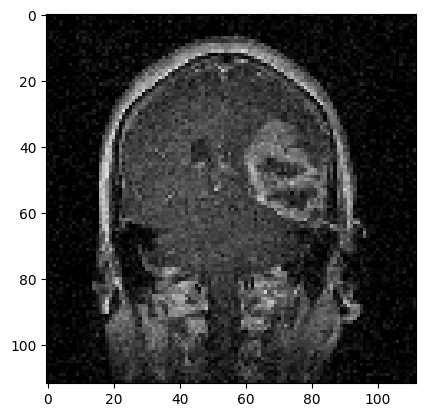

In [14]:
plt.imshow(X[20])

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [16]:
model = keras.Sequential([

    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu',input_shape=(112,112,3)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    keras.layers.UpSampling2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    keras.layers.UpSampling2D(2),
    keras.layers.Conv2D(3,3,padding='same',activation='sigmoid')
    
])

In [17]:
def pixel_mse_loss(y_true,y_pred):
  return tf.reduce_mean( (y_true - y_pred) ** 2 )

def PSNR(y_true,y_pred):
  mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
  return 20 * log10(1 / (mse ** 0.5))

def log10(x):
  numerator = tf.math.log(x)
  denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
  return numerator / denominator

In [18]:
model.compile(optimizer='Adam',loss='mse',metrics=[PSNR])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 up_sampling2d (UpSampling2D  (None, 56, 56, 64)       0

In [19]:
model.reset_states()
model.fit(X,y,epochs=20,batch_size=16)

Epoch 1/20
357/357 [==============================] - 14s 34ms/step - loss: 0.0114 - PSNR: 21.0898
Epoch 2/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0041 - PSNR: 24.0268
Epoch 3/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0035 - PSNR: 24.7759
Epoch 4/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0030 - PSNR: 25.4503
Epoch 5/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0027 - PSNR: 25.8988
Epoch 6/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0025 - PSNR: 26.2648
Epoch 7/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0023 - PSNR: 26.4893
Epoch 8/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0022 - PSNR: 26.6856
Epoch 9/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0021 - PSNR: 26.9408
Epoch 10/20
357/357 [==============================] - 12s 34ms/step - loss: 0.0020 - PSNR: 27.0787
Epoch 11/

In [20]:
keras.models.save_model(model,"denoiser2.h5")